In [1]:
import pandas as pd
import numpy as np
from math import log
import matplotlib.pyplot as plt
# import statsmodel to run regression
import statsmodels.formula.api as sm
import seaborn as sns
# set sns layout
sns.set(style="darkgrid")

In [2]:
# read data from csv file
# the invalid_values are values that need to be treated as missing values
invalid_values = ['-',' -   ']

csv_data = pd.read_csv('modeling.csv', na_values=invalid_values)

In [3]:
# assign csv_data to data frame var named 'df'
df = pd.DataFrame(csv_data)
# show info of the loaded file
df.info()
print('shape: ', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               50 non-null     int64  
 1   year             50 non-null     int64  
 2   gva_agri         22 non-null     float64
 3   employment_agri  50 non-null     int64  
 4   bsod             21 non-null     float64
 5   machineries      22 non-null     float64
 6   tractors         22 non-null     float64
 7   dcf_total        22 non-null     float64
 8   tfp              22 non-null     float64
 9   exp_irrigation   18 non-null     float64
 10  exp_postharvest  18 non-null     float64
 11  exp_other_infra  0 non-null      float64
 12  exp_rd           18 non-null     float64
 13  exp_pss          18 non-null     float64
 14  exp_mds          18 non-null     float64
 15  exp_esets        18 non-null     float64
 16  cpi              26 non-null     float64
 17  def_irrigation   1

In [4]:
temp_df = df.append(df)
temp_df.shape

(100, 23)

In [5]:
temp_df.drop_duplicates(inplace=True)
temp_df.shape

(50, 23)

In [6]:
# print column names
df.columns

Index(['id', 'year', 'gva_agri', 'employment_agri', 'bsod', 'machineries',
       'tractors', 'dcf_total', 'tfp', 'exp_irrigation', 'exp_postharvest',
       'exp_other_infra', 'exp_rd', 'exp_pss', 'exp_mds', 'exp_esets', 'cpi',
       'def_irrigation', 'def_postharvest', 'def_rd', 'def_pss', 'def_mds',
       'def_esets'],
      dtype='object')

In [7]:
# test rename
df.rename(columns={
    'id': 'index',
    'dcf_total': 'dcf'
}, inplace=True)
df.columns

# or transform all columns into lowercase
df.columns = [col.lower() for col in df]
df.columns

Index(['index', 'year', 'gva_agri', 'employment_agri', 'bsod', 'machineries',
       'tractors', 'dcf', 'tfp', 'exp_irrigation', 'exp_postharvest',
       'exp_other_infra', 'exp_rd', 'exp_pss', 'exp_mds', 'exp_esets', 'cpi',
       'def_irrigation', 'def_postharvest', 'def_rd', 'def_pss', 'def_mds',
       'def_esets'],
      dtype='object')

In [8]:
# show some data
print('First 5 rows')
df.head()

First 5 rows


,index,year,gva_agri,employment_agri,bsod,machineries,tractors,dcf,tfp,exp_irrigation,...,exp_pss,exp_mds,exp_esets,cpi,def_irrigation,def_postharvest,def_rd,def_pss,def_mds,def_esets
0,1,1971,NaN,6321,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972,NaN,6863,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1973,NaN,7766,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1974,NaN,7684,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1973,NaN,7766,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print('Last 5 rows')
df.tail()

Last 5 rows


,index,year,gva_agri,employment_agri,bsod,machineries,tractors,dcf,tfp,exp_irrigation,...,exp_pss,exp_mds,exp_esets,cpi,def_irrigation,def_postharvest,def_rd,def_pss,def_mds,def_esets
45,46,2015,1170256.0,11294,99286.0,5444.0,221.0,104952.0,1054011.0,1496.0,...,5504.0,214.0,2212.0,107.0,14.0,29.0,12.0,51.0,2.0,21.0
46,47,2016,1210438.0,11064,102845.0,6524.0,410.0,109779.0,1089595.0,1355.0,...,6311.0,158.0,2081.0,108.0,13.0,27.0,11.0,58.0,1.0,19.0
47,48,2017,1327952.0,10261,106255.0,9907.0,524.0,116686.0,1201005.0,3292.0,...,6527.0,163.0,3180.0,112.0,30.0,40.0,11.0,59.0,1.0,29.0
48,49,2018,1400390.0,9998,111286.0,10355.0,600.0,122240.0,1268152.0,2637.0,...,8504.0,187.0,3246.0,117.0,22.0,37.0,12.0,73.0,2.0,28.0
49,50,2019,1323806.0,8622,NaN,9299.0,589.0,9888.0,1305296.0,NaN,...,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# check for null values, this returns true/false if the cell is null or not, this will drop everything since exp_other_infra is null so let's drop that first
df.isnull()
# to aggregate

df.isnull().sum()

index               0
year                0
gva_agri           28
employment_agri     0
bsod               29
machineries        28
tractors           28
dcf                28
tfp                28
exp_irrigation     32
exp_postharvest    32
exp_other_infra    50
exp_rd             32
exp_pss            32
exp_mds            32
exp_esets          32
cpi                24
def_irrigation     32
def_postharvest    32
def_rd             32
def_pss            32
def_mds            32
def_esets          32
dtype: int64

In [11]:
# this will drop all null values, this will return a new dataframe so you need to put inplace=True if you want to modify the original dataframe
# this is bad idea lol
# df.dropna(axis=1, inplace=True)
# then check how many were dropped
df.drop(columns=['exp_other_infra'],inplace=True)
df.shape

(50, 22)

In [12]:
# check data types
print('Check the datatypes')
df.dtypes

Check the datatypes


index                int64
year                 int64
gva_agri           float64
employment_agri      int64
bsod               float64
machineries        float64
tractors           float64
dcf                float64
tfp                float64
exp_irrigation     float64
exp_postharvest    float64
exp_rd             float64
exp_pss            float64
exp_mds            float64
exp_esets          float64
cpi                float64
def_irrigation     float64
def_postharvest    float64
def_rd             float64
def_pss            float64
def_mds            float64
def_esets          float64
dtype: object

In [13]:
# change data type
df['def_irrigation'] = df['def_irrigation'].astype('float64')
df['def_postharvest'] = df['def_postharvest'].astype('float64')
# df.dtypes

In [14]:
print('Summary of the data')
df.describe()

Summary of the data


,index,year,gva_agri,employment_agri,bsod,machineries,tractors,dcf,tfp,exp_irrigation,...,exp_pss,exp_mds,exp_esets,cpi,def_irrigation,def_postharvest,def_rd,def_pss,def_mds,def_esets
count,50.00000,50.000000,2.200000e+01,50.000000,21.000000,22.000000,22.000000,22.000000,2.200000e+01,18.000000,...,18.000000,18.000000,18.000000,26.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,25.50000,1994.460000,8.421958e+05,10166.200000,100288.904762,2719.772727,313.500000,98763.545455,7.321964e+05,4399.166667,...,4188.666667,145.388889,1791.444444,79.461538,58.777778,30.277778,10.277778,45.944444,1.666667,20.277778
std,14.57738,14.606694,3.520185e+05,1624.039446,5649.100901,3306.948729,196.905283,21212.621875,3.541838e+05,4317.066368,...,2142.009172,70.075706,868.515652,25.227336,64.496745,14.364194,6.066354,19.114122,0.907485,10.637368
min,1.00000,1971.000000,3.562110e+05,6321.000000,89050.000000,385.000000,167.000000,9888.000000,2.559960e+05,209.000000,...,1811.000000,22.000000,491.000000,39.000000,2.000000,4.000000,3.000000,25.000000,0.000000,7.000000
25%,13.25000,1982.250000,4.975822e+05,9302.250000,97629.000000,637.000000,205.500000,98792.500000,3.838205e+05,1284.500000,...,2477.000000,88.750000,964.750000,59.750000,12.250000,25.250000,6.250000,30.250000,1.000000,11.000000
50%,25.50000,1994.500000,8.540590e+05,10332.000000,99286.000000,950.000000,225.500000,101707.000000,7.406940e+05,2964.500000,...,3786.500000,156.500000,1932.000000,78.000000,26.000000,28.500000,8.500000,40.500000,2.000000,18.500000
75%,37.75000,2006.750000,1.151675e+06,11298.500000,102205.000000,2740.500000,323.500000,104447.250000,1.036260e+06,6759.250000,...,5398.000000,199.000000,2249.500000,102.250000,86.500000,32.750000,11.750000,56.250000,2.000000,27.250000
max,50.00000,2019.000000,1.400390e+06,12960.000000,111286.000000,10355.000000,975.000000,122240.000000,1.305296e+06,13240.000000,...,8504.000000,267.000000,3246.000000,120.000000,206.000000,74.000000,27.000000,94.000000,4.000000,42.000000


In [15]:
# define x and y
y = df['gva_agri']
x = df['year']

Plot dependent variable over the years


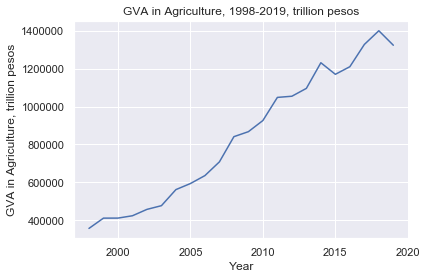

In [16]:
print('Plot dependent variable over the years')
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('GVA in Agriculture, trillion pesos')
plt.title('GVA in Agriculture, 1998-2019, trillion pesos')
plt.show()

In [17]:
# add log column
# see top answer at https://stackoverflow.com/questions/12555323/adding-new-column-to-existing-dataframe-in-python-pandas
df['ln_gva_agri'] = pd.Series(np.log(df['gva_agri']), df.index)
df['ln_employment_agri'] = pd.Series(np.log(df['employment_agri']), df.index)
df['ln_year'] = pd.Series(np.log(df['year']), df.index)

In [18]:
new_df = df.loc[df['year'] > 1997]

In [19]:
# describe the new data
print('Retrieve sample data for 1997-2019 since some data are missing from previous years')
new_df.describe()

Retrieve sample data for 1997-2019 since some data are missing from previous years


,index,year,gva_agri,employment_agri,bsod,machineries,tractors,dcf,tfp,exp_irrigation,...,cpi,def_irrigation,def_postharvest,def_rd,def_pss,def_mds,def_esets,ln_gva_agri,ln_employment_agri,ln_year
count,22.000000,22.000000,2.200000e+01,22.000000,21.000000,22.000000,22.000000,22.000000,2.200000e+01,18.000000,...,22.0000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,22.000000,22.000000,22.000000
mean,39.500000,2008.500000,8.421958e+05,11235.863636,100288.904762,2719.772727,313.500000,98763.545455,7.321964e+05,4399.166667,...,86.0000,58.777778,30.277778,10.277778,45.944444,1.666667,20.277778,13.550042,9.322857,7.605138
std,6.493587,6.493587,3.520185e+05,1002.678855,5649.100901,3306.948729,196.905283,21212.621875,3.541838e+05,4317.066368,...,21.5495,64.496745,14.364194,6.066354,19.114122,0.907485,10.637368,0.456782,0.092966,0.003233
min,29.000000,1998.000000,3.562110e+05,8622.000000,89050.000000,385.000000,167.000000,9888.000000,2.559960e+05,209.000000,...,52.0000,2.000000,4.000000,3.000000,25.000000,0.000000,7.000000,12.783279,9.062072,7.599902
25%,34.250000,2003.250000,4.975822e+05,10504.000000,97629.000000,637.000000,205.500000,98792.500000,3.838205e+05,1284.500000,...,65.7500,12.250000,25.250000,6.250000,30.250000,1.000000,11.000000,13.114922,9.259403,7.602526
50%,39.500000,2008.500000,8.540590e+05,11297.000000,99286.000000,950.000000,225.500000,101707.000000,7.406940e+05,2964.500000,...,87.5000,26.000000,28.500000,8.500000,40.500000,2.000000,18.500000,13.657636,9.332292,7.605143
75%,44.750000,2013.750000,1.151675e+06,12011.500000,102205.000000,2740.500000,323.500000,104447.250000,1.036260e+06,6759.250000,...,105.2500,86.500000,32.750000,11.750000,56.250000,2.000000,27.250000,13.956329,9.393616,7.607754
max,50.000000,2019.000000,1.400390e+06,12960.000000,111286.000000,10355.000000,975.000000,122240.000000,1.305296e+06,13240.000000,...,120.0000,206.000000,74.000000,27.000000,94.000000,4.000000,42.000000,14.152261,9.469623,7.610358


In [20]:
# check correlation
new_df.corr()

,index,year,gva_agri,employment_agri,bsod,machineries,tractors,dcf,tfp,exp_irrigation,...,cpi,def_irrigation,def_postharvest,def_rd,def_pss,def_mds,def_esets,ln_gva_agri,ln_employment_agri,ln_year
index,1.000000,1.000000,0.988449,-0.135745,0.548841,0.820581,0.226863,-0.100995,0.988839,-0.660832,...,0.996391,-0.743156,0.007287,-0.327852,0.302933,-0.206413,-0.095816,0.984648,-0.157530,0.999999
year,1.000000,1.000000,0.988449,-0.135745,0.548841,0.820581,0.226863,-0.100995,0.988839,-0.660832,...,0.996391,-0.743156,0.007287,-0.327852,0.302933,-0.206413,-0.095816,0.984648,-0.157530,0.999999
gva_agri,0.988449,0.988449,1.000000,-0.120462,0.461324,0.813811,0.208523,-0.065052,0.998124,-0.651553,...,0.992885,-0.733316,0.021847,-0.312711,0.293986,-0.147979,-0.069027,0.987503,-0.138968,0.988400
employment_agri,-0.135745,-0.135745,-0.120462,1.000000,0.048094,-0.552339,-0.374610,0.507476,-0.152950,-0.039745,...,-0.116077,-0.040367,-0.188672,-0.301392,-0.366358,-0.048373,-0.398408,-0.006256,0.998053,-0.134611
bsod,0.548841,0.548841,0.461324,0.048094,1.000000,0.485948,0.196296,0.934578,0.446937,0.017527,...,0.502606,-0.078001,0.066027,-0.305758,0.043687,-0.337913,-0.319755,0.505764,0.027447,0.549171
machineries,0.820581,0.820581,0.813811,-0.552339,0.485948,1.000000,0.481841,-0.174401,0.820845,-0.346448,...,0.795556,-0.410337,0.139553,0.038590,0.419053,-0.083129,0.231463,0.734562,-0.563332,0.819874
tractors,0.226863,0.226863,0.208523,-0.374610,0.196296,0.481841,1.000000,-0.182130,0.219217,0.240135,...,0.215111,0.256514,0.416106,0.650517,0.145861,0.567669,0.568407,0.138326,-0.379424,0.226260
dcf,-0.100995,-0.100995,-0.065052,0.507476,0.934578,-0.174401,-0.182130,1.000000,-0.125983,-0.146999,...,-0.106945,-0.242362,0.124907,-0.170060,0.235536,-0.253017,-0.089536,-0.026626,0.545756,-0.100395
tfp,0.988839,0.988839,0.998124,-0.152950,0.446937,0.820845,0.219217,-0.125983,1.000000,-0.654900,...,0.993548,-0.735478,0.019924,-0.311508,0.292921,-0.144027,-0.066824,0.983078,-0.173630,0.988751
exp_irrigation,-0.660832,-0.660832,-0.651553,-0.039745,0.017527,-0.346448,0.240135,-0.146999,-0.654900,1.000000,...,-0.670474,0.982131,0.570129,0.540940,-0.069889,0.507129,0.309939,-0.686722,-0.037641,-0.661192


In [21]:
# define the ols
result = sm.ols(formula='gva_agri ~ year + employment_agri + bsod + machineries + tractors',data=new_df).fit()

In [22]:
print('Result of regression analysis')
print(result.summary())

Result of regression analysis
                            OLS Regression Results                            
Dep. Variable:               gva_agri   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     259.3
Date:                Tue, 26 May 2020   Prob (F-statistic):           5.25e-14
Time:                        09:03:01   Log-Likelihood:                -250.03
No. Observations:                  21   AIC:                             512.1
Df Residuals:                      15   BIC:                             518.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept   

In [23]:
# x and y corresponds to name of column, which is mapped to the dataset
def plot(x, y):
    sns.regplot(x, y, data=new_df)
    plt.show(sns)

GVA agri vs Year


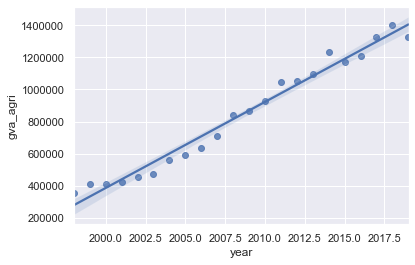

In [24]:
print('GVA agri vs Year')
plot('year','gva_agri')

GVA agri vs Employment in agri


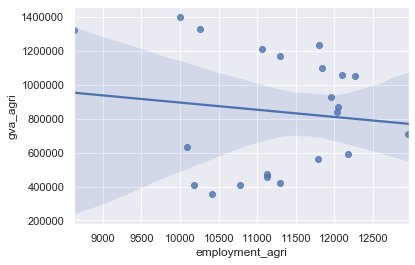

In [25]:
print('GVA agri vs Employment in agri')
plot('employment_agri','gva_agri')

GVA agri vs BSOD


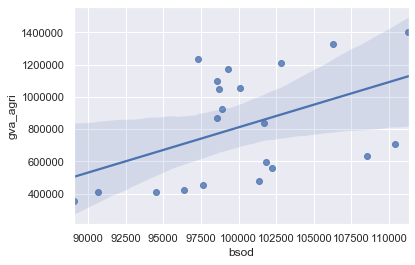

In [26]:
print('GVA agri vs BSOD')
plot('bsod','gva_agri')

GVA agri vs Tractors


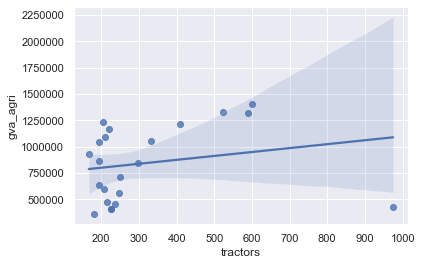

In [27]:
print('GVA agri vs Tractors')
plot('tractors','gva_agri')

GVA agri vs Machineries


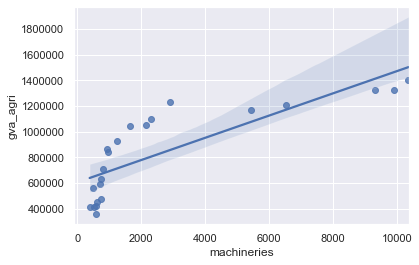

In [28]:
print('GVA agri vs Machineries')
plot('machineries','gva_agri')

In [29]:
# Try running against log data
ln_result = sm.ols(formula='ln_gva_agri ~ ln_employment_agri + ln_year',data=new_df).fit()
print('Result of Double-Log regression')
ln_result.summary()

Result of Double-Log regression


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ln_gva_agri   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     684.1
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.99e-18
Time:                        09:03:04   Log-Likelihood:                 33.729
No. Observations:                  22   AIC:                            -61.46
Df Residuals:                      19   BIC:                            -58.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1072.3865     29.430    -36.439      0.000   -1133.984   -1010.789
ln_employment_agri     0.6380      0.134      4.777      0.000       0.358       0.918
ln_year              142.0077      3.841     36.974      0.000     133.969     150.046
==============================================================================
Omnibus:                        5.691   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                1.692
Skew:                          -0.079   Prob(JB):                        0.429
Kurtosis:                       1.651   Cond. No.                     2.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
ypred = ln_result.predict(df)
df['predicted'] = ypred